In [ ]:
def accuracy(y_true, y_pred):
  # appropriate for balanced classes
  correct_preds = torch.eq(y_true, y_pred).sum().item()
  return (correct_preds / len(y_pred)) * 100

# **0. PyTorch Modules**

- In PyTorch,
    - a module refers to a component or a building block of a neural network model.
    - Modules can contain various layers, operations, or sub-modules.
- PyTorch has **several essential modules**, of which four are:
    - [`torch.nn`](https://pytorch.org/docs/stable/nn.html): Contains all of the **building blocks for computational graphs**.
    - [`torch.optim`](https://pytorch.org/docs/stable/optim.html): Contains optimization algorithms how the model parameters update.
    - [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset): Base dataset class for PyTorch, capable of dealing with different types of data..
    - [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html): Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`).

- [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) is the **base class** for all neural network modules in PyTorch.
    - Building an NN should subclass `nn.Module` with a must `forward()` method .

# **PyTorch Datasets and Data Loaders**

- A **dataset** is a collection of data relating to a specific problem.
For example,
  * Food image classification model, **images of food**.

  * Spam email identifier model, **messages from  emails**.

  * Sound classification model (e.g., Shazam), **sound samples**.

  * Product recommendation system (e.g., online recommendations), **purchased products**.


- So far we had a training loop over the **entire training set** at once.
    - This might be very time consuming as it does gradient calculations for the whole dataset.
    - A better way is to divide the dataset into **smaller chunks** called **batches**.
    - **Efficiency in data loading**:
        - Allows for on-the-fly preprocessing for only a batch of data during data loading.
        - Minimizes memory overhead and computational cost associated with large datasets.
- Such procedure can be faciliatated using PyTorch built-in datasets

- There are different problem-specific built-in datasets in PyTorch.
    - **Vision**: [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html),
    - **Audio**: [`torchaudio.datasets`](https://pytorch.org/audio/stable/datasets.html),
    - **Text - NLP**: [`torchtext.datasets`](https://pytorch.org/text/stable/datasets.html),
    - **Recommendation system**: [`torchrec.datasets`](https://pytorch.org/torchrec/torchrec.datasets.html).
- These built-in datasets offer a powerful and flexible way to handle complex datasets.
    - Ensures compatibility with the broader PyTorch framework.
    - Main component for batch-size data loading pipeline.
    - Faciliates preprocessing of data (**transforming images**, **data augmentation**).
    - Promotes a clean, modular codebase.
- Creating custom datasets, subclassing PyTorch `Dataset`, allows a standardized structure.

    - Base class for all PyTorch datasets is `torch.utils.data.Dataset`.
- **PyTorch Dataset** is typically used in combination with **PyTorch DataLoader** (`torch.utils.data.DataLoader`).
- The **DataLoader** turns the `Dataset` into a batch-based **iterable** format.
    - It helps in loading the data in parallel during model training or evaluation.
    - It provides features like **shuffling**, **batching**, and **multiprocessing**.


         


# **1. Structured Data**

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.csv")
data_df["Wine"] = data_df["Wine"] - 1
data_df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)

## **1.1. Dataset ([`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset))**

- Custom datasets can be created by subclassing the `Dataset` class.

- Key components of a `Dataset`
    - **`__init__` method**: initialize the dataset, typically **loading data** and **performing any necessary preprocessing**.

    - **`__len__` method**: It returns the **number of samples** in the dataset. It allows us to use `len()` function on an instance of the dataset to get its size.

    - **`__getitem__` method**: It is responsible for loading and preprocessing a **single data sample** from the dataset. Given an **index**, it should return the corresponding **data sample**.

 - When creating a custom dataset, we need to assocaite the **`__len__()`** (*recommended, not required*) and **`__getitem__()`** (*required*) methods.

- Transforming and preprocessing (encoding categorical variables, standardizing numerical variables).

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, data_df, target_name):
    self.data_df = data_df
    self.target_name = target_name
    self._inputs_outputs()

  def _inputs_outputs(self):
    inputs_df = self.data_df.drop(columns=[self.target_name])
    self.data = torch.tensor(inputs_df.values, dtype=torch.float32)

    outputs_df = self.data_df.loc[:, [self.target_name]]
    self.targets = torch.tensor(outputs_df.values.squeeze())

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, idx):
    return self.data[idx], self.targets[idx]

- Let us create the train dataset

In [ ]:
train_dataset = CustomDataset(train_df, "Wine")
train_dataset

In [ ]:
train_dataset.data.shape, train_dataset.targets.shape

(torch.Size([142, 13]), torch.Size([142]))

In [ ]:
train_dataset.data.shape[1:]

torch.Size([13])

In [ ]:
X_train_0, y_train_0 = train_dataset[0]
X_train_0, y_train_0

(tensor([1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02]),
 tensor(2))

In [ ]:
train_dataset.data

tensor([[1.4340e+01, 1.6800e+00, 2.7000e+00,  ..., 5.7000e-01, 1.9600e+00,
         6.6000e+02],
        [1.2530e+01, 5.5100e+00, 2.6400e+00,  ..., 8.2000e-01, 1.6900e+00,
         5.1500e+02],
        [1.2370e+01, 1.0700e+00, 2.1000e+00,  ..., 1.0400e+00, 2.7700e+00,
         6.6000e+02],
        ...,
        [1.4380e+01, 1.8700e+00, 2.3800e+00,  ..., 1.2000e+00, 3.0000e+00,
         1.5470e+03],
        [1.2690e+01, 1.5300e+00, 2.2600e+00,  ..., 9.6000e-01, 2.0600e+00,
         4.9500e+02],
        [1.2340e+01, 2.4500e+00, 2.4600e+00,  ..., 8.0000e-01, 3.3800e+00,
         4.3800e+02]])

In [ ]:
train_dataset.targets

tensor([2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0,
        2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1,
        2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
        2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2,
        1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [ ]:
len(train_dataset.data), len(train_dataset.targets)

(142, 142)

In [ ]:
train_dataset.data.shape, train_dataset.targets.shape

(torch.Size([142, 13]), torch.Size([142]))

In [ ]:
train_dataset.data.shape[1:]

torch.Size([13])

- Let us look at this dataset, get first sample and unpack

In [ ]:
train_dataset.__len__(), len(train_dataset)

(142, 142)

In [ ]:
first_train_obs = train_dataset.__getitem__(0)
first_train_obs

(tensor([1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02]),
 tensor(2))

In [ ]:
first_train_obs = train_dataset[0]
first_train_obs

(tensor([1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02]),
 tensor(2))

In [ ]:
features, label = first_train_obs
print(features)
print(label)

tensor([1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
        1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
        6.6000e+02])
tensor(2)


- The same is true for the test dataset.

In [ ]:
test_dataset = CustomDataset(test_df, "Wine")
test_dataset

In [ ]:
len(test_dataset.data), len(test_dataset.targets)

(36, 36)

In [ ]:
test_dataset.__len__(), len(test_dataset)

(36, 36)

In [ ]:
first_test_obs = test_dataset[0]
first_test_obs

(tensor([1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02]),
 tensor(0))

In [ ]:
X_test_0, y_test_0 = test_dataset[0]
X_test_0, y_test_0

(tensor([1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02]),
 tensor(0))

**Iterator vs Iterable**

- In Python, **iterators** and **iterables** are foundational concepts for working with sequences of data in a structured and efficient manner.
    - **Iterator**:
        - An object that represents a stream of data; it returns the data one element at a time.
        - Implemented with two methods:
            - `__iter__()`: Returns the **iterator** object itself.
            - `__next__()`: Returns the **next element** in the sequence.   
                - When no more elements, it raises a `StopIteration` exception.

    - **Iterable**:
        - Any object **capable of returning its members one at a time**.
            - `__iter__` method returns an `iterator`,
            - `__getitem__` method raises `IndexError` when indices are exhausted.
        - Examples: lists, tuples, strings, dictionaries, and sets.
- **Iterators** are used to iterate over **iterables**.
    - Keep state, remember where it is during iteration
    - Calling `next()` function produces each element of the **iterable** **one at a time**.


## **1.2. DataLoader ([`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader))**

- Right now the data is in the form of PyTorch `torch.utils.data.Datasets`.  

- The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

- The `DataLoader` turns a `Dataset` into a Python **iterable** of **smaller chunks** called called **batches** (or **mini-batches**).

- Advantages:

    1. It is **computationally efficient** for handling large datasets that do **not fit into memory**.
      - In an ideal world, we could do the forward and backward passes across **all examples of the data** at once (e.g., loading 100,000 images at one hit).
      - It is easier to bre, providing an easy way to **shuffle**, and **parallelize** data loading.

    2. It also gives the model **more opportunities to improve or update its gradients** per epoch.
      - With **mini-batches**, gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

- The batch size is a **hyperparameter** to be set.
    - Gnerally, **powers of 2** are used most often (e.g. 32, 64, 128, 256, 512).


- Let us create **DataLoader**s for the training and test sets.

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset,  # Dataset to be turned into iterable
                                  batch_size=4,           # Number of examples per epoch
                                  shuffle=True,           # True -> shuffle data every epoch
                                  num_workers=2           # Number of processors to be used  for data loading (higher = more)
                                  )
train_dataloader, len(train_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x7faa78db5720>, 36)

- The `num_workers` defines **how many subprocesses** will be created to load the data
    - Higher `num_workers`, **more compute power** to load data.
    - Usually set to the **total number of CPUs** by counting via Python's [`os.cpu_count()`](https://docs.python.org/3/library/os.html#os.cpu_count).
    - This ensures the `DataLoader` recruits as many cores as possible to load data.

In [ ]:
import os
num_workers = os.cpu_count()
num_workers

2

- The length of the `DataLoader` represents the **number of batches**: ceil(number of samples / batch size).

In [ ]:
import math
math.ceil(len(train_dataloader.dataset)/4)

36

In [ ]:
list(train_dataloader)

[[tensor([[1.3870e+01, 1.9000e+00, 2.8000e+00, 1.9400e+01, 1.0700e+02, 2.9500e+00,
           2.9700e+00, 3.7000e-01, 1.7600e+00, 4.5000e+00, 1.2500e+00, 3.4000e+00,
           9.1500e+02],
          [1.2690e+01, 1.5300e+00, 2.2600e+00, 2.0700e+01, 8.0000e+01, 1.3800e+00,
           1.4600e+00, 5.8000e-01, 1.6200e+00, 3.0500e+00, 9.6000e-01, 2.0600e+00,
           4.9500e+02],
          [1.2700e+01, 3.5500e+00, 2.3600e+00, 2.1500e+01, 1.0600e+02, 1.7000e+00,
           1.2000e+00, 1.7000e-01, 8.4000e-01, 5.0000e+00, 7.8000e-01, 1.2900e+00,
           6.0000e+02],
          [1.2930e+01, 3.8000e+00, 2.6500e+00, 1.8600e+01, 1.0200e+02, 2.4100e+00,
           2.4100e+00, 2.5000e-01, 1.9800e+00, 4.5000e+00, 1.0300e+00, 3.5200e+00,
           7.7000e+02]]),
  tensor([0, 1, 2, 0])],
 [tensor([[1.2250e+01, 3.8800e+00, 2.2000e+00, 1.8500e+01, 1.1200e+02, 1.3800e+00,
           7.8000e-01, 2.9000e-01, 1.1400e+00, 8.2100e+00, 6.5000e-01, 2.0000e+00,
           8.5500e+02],
          [1.1820e+01, 

- The dataloader is an **iterable**.
- Let us convert to an **iterator**.
- And look at each example in it

In [ ]:
train_dataloader_iter = iter(train_dataloader)

In [ ]:
next(train_dataloader_iter)

[tensor([[1.3450e+01, 3.7000e+00, 2.6000e+00, 2.3000e+01, 1.1100e+02, 1.7000e+00,
          9.2000e-01, 4.3000e-01, 1.4600e+00, 1.0680e+01, 8.5000e-01, 1.5600e+00,
          6.9500e+02],
         [1.3050e+01, 5.8000e+00, 2.1300e+00, 2.1500e+01, 8.6000e+01, 2.6200e+00,
          2.6500e+00, 3.0000e-01, 2.0100e+00, 2.6000e+00, 7.3000e-01, 3.1000e+00,
          3.8000e+02],
         [1.3480e+01, 1.8100e+00, 2.4100e+00, 2.0500e+01, 1.0000e+02, 2.7000e+00,
          2.9800e+00, 2.6000e-01, 1.8600e+00, 5.1000e+00, 1.0400e+00, 3.4700e+00,
          9.2000e+02],
         [1.3510e+01, 1.8000e+00, 2.6500e+00, 1.9000e+01, 1.1000e+02, 2.3500e+00,
          2.5300e+00, 2.9000e-01, 1.5400e+00, 4.2000e+00, 1.1000e+00, 2.8700e+00,
          1.0950e+03]]),
 tensor([2, 1, 0, 0])]

- There are 4 feature vectors because the batch size is specified as 4.

In [ ]:
next(train_dataloader_iter)

[tensor([[1.4380e+01, 1.8700e+00, 2.3800e+00, 1.2000e+01, 1.0200e+02, 3.3000e+00,
          3.6400e+00, 2.9000e-01, 2.9600e+00, 7.5000e+00, 1.2000e+00, 3.0000e+00,
          1.5470e+03],
         [1.3720e+01, 1.4300e+00, 2.5000e+00, 1.6700e+01, 1.0800e+02, 3.4000e+00,
          3.6700e+00, 1.9000e-01, 2.0400e+00, 6.8000e+00, 8.9000e-01, 2.8700e+00,
          1.2850e+03],
         [1.3520e+01, 3.1700e+00, 2.7200e+00, 2.3500e+01, 9.7000e+01, 1.5500e+00,
          5.2000e-01, 5.0000e-01, 5.5000e-01, 4.3500e+00, 8.9000e-01, 2.0600e+00,
          5.2000e+02],
         [1.2080e+01, 2.0800e+00, 1.7000e+00, 1.7500e+01, 9.7000e+01, 2.2300e+00,
          2.1700e+00, 2.6000e-01, 1.4000e+00, 3.3000e+00, 1.2700e+00, 2.9600e+00,
          7.1000e+02]]),
 tensor([0, 0, 2, 1])]

In [ ]:
next(train_dataloader_iter)

[tensor([[1.2850e+01, 1.6000e+00, 2.5200e+00, 1.7800e+01, 9.5000e+01, 2.4800e+00,
          2.3700e+00, 2.6000e-01, 1.4600e+00, 3.9300e+00, 1.0900e+00, 3.6300e+00,
          1.0150e+03],
         [1.2210e+01, 1.1900e+00, 1.7500e+00, 1.6800e+01, 1.5100e+02, 1.8500e+00,
          1.2800e+00, 1.4000e-01, 2.5000e+00, 2.8500e+00, 1.2800e+00, 3.0700e+00,
          7.1800e+02],
         [1.2420e+01, 4.4300e+00, 2.7300e+00, 2.6500e+01, 1.0200e+02, 2.2000e+00,
          2.1300e+00, 4.3000e-01, 1.7100e+00, 2.0800e+00, 9.2000e-01, 3.1200e+00,
          3.6500e+02],
         [1.4220e+01, 3.9900e+00, 2.5100e+00, 1.3200e+01, 1.2800e+02, 3.0000e+00,
          3.0400e+00, 2.0000e-01, 2.0800e+00, 5.1000e+00, 8.9000e-01, 3.5300e+00,
          7.6000e+02]]),
 tensor([0, 1, 1, 0])]

In [ ]:
train_features_batch, train_targets_batch = next(train_dataloader_iter)
print(train_features_batch),
print(train_targets_batch)

tensor([[1.2810e+01, 2.3100e+00, 2.4000e+00, 2.4000e+01, 9.8000e+01, 1.1500e+00,
         1.0900e+00, 2.7000e-01, 8.3000e-01, 5.7000e+00, 6.6000e-01, 1.3600e+00,
         5.6000e+02],
        [1.2700e+01, 3.8700e+00, 2.4000e+00, 2.3000e+01, 1.0100e+02, 2.8300e+00,
         2.5500e+00, 4.3000e-01, 1.9500e+00, 2.5700e+00, 1.1900e+00, 3.1300e+00,
         4.6300e+02],
        [1.2510e+01, 1.2400e+00, 2.2500e+00, 1.7500e+01, 8.5000e+01, 2.0000e+00,
         5.8000e-01, 6.0000e-01, 1.2500e+00, 5.4500e+00, 7.5000e-01, 1.5100e+00,
         6.5000e+02],
        [1.2640e+01, 1.3600e+00, 2.0200e+00, 1.6800e+01, 1.0000e+02, 2.0200e+00,
         1.4100e+00, 5.3000e-01, 6.2000e-01, 5.7500e+00, 9.8000e-01, 1.5900e+00,
         4.5000e+02]])
tensor([2, 1, 2, 1])


In [ ]:
train_features_batch.shape, train_targets_batch.shape

(torch.Size([4, 13]), torch.Size([4]))

- Let us inspect the test data loader

In [ ]:
test_dataloader = DataLoader(dataset=test_dataset, batch_size=4, shuffle=False, num_workers=2)
test_dataloader, len(test_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x7faa79352aa0>, 9)

In [ ]:
for a, b in test_dataloader:
  print("X", a)
  print("y", b)

X tensor([[1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03],
        [1.2930e+01, 2.8100e+00, 2.7000e+00, 2.1000e+01, 9.6000e+01, 1.5400e+00,
         5.0000e-01, 5.3000e-01, 7.5000e-01, 4.6000e+00, 7.7000e-01, 2.3100e+00,
         6.0000e+02],
        [1.3730e+01, 1.5000e+00, 2.7000e+00, 2.2500e+01, 1.0100e+02, 3.0000e+00,
         3.2500e+00, 2.9000e-01, 2.3800e+00, 5.7000e+00, 1.1900e+00, 2.7100e+00,
         1.2850e+03]])
y tensor([0, 0, 2, 0])
X tensor([[1.2370e+01, 1.1700e+00, 1.9200e+00, 1.9600e+01, 7.8000e+01, 2.1100e+00,
         2.0000e+00, 2.7000e-01, 1.0400e+00, 4.6800e+00, 1.1200e+00, 3.4800e+00,
         5.1000e+02],
        [1.4300e+01, 1.9200e+00, 2.7200e+00, 2.0000e

In [ ]:
for X, y in test_dataloader:
  print(X, y)

tensor([[1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03],
        [1.2930e+01, 2.8100e+00, 2.7000e+00, 2.1000e+01, 9.6000e+01, 1.5400e+00,
         5.0000e-01, 5.3000e-01, 7.5000e-01, 4.6000e+00, 7.7000e-01, 2.3100e+00,
         6.0000e+02],
        [1.3730e+01, 1.5000e+00, 2.7000e+00, 2.2500e+01, 1.0100e+02, 3.0000e+00,
         3.2500e+00, 2.9000e-01, 2.3800e+00, 5.7000e+00, 1.1900e+00, 2.7100e+00,
         1.2850e+03]]) tensor([0, 0, 2, 0])
tensor([[1.2370e+01, 1.1700e+00, 1.9200e+00, 1.9600e+01, 7.8000e+01, 2.1100e+00,
         2.0000e+00, 2.7000e-01, 1.0400e+00, 4.6800e+00, 1.1200e+00, 3.4800e+00,
         5.1000e+02],
        [1.4300e+01, 1.9200e+00, 2.7200e+00, 2.0000e+01, 1

- The `enumerate()` function is used to iterate over an iterable (list, tuple, string, ...), **keeping track of the index** of each element.
- It returns an **iterator of tuples containing the index and the corresponding element** from the sequence.

        ```
        c = [('apple', 'red'), ('banana', 'yellow'), ('orange', 'orange')]

        for b, (a, b) in enumerate(c):
            print(f"Index: {b}, Value a: {a}, Value b: {b}")
        ```
Output
        ```
        Index: 0, Value a: apple, Value b: red
        Index: 1, Value a: banana, Value b: yellow
        Index: 2, Value a: orange, Value b: orange
        ```

In [ ]:
for a, (b, c) in enumerate(test_dataloader):
  print(f"Batch = {a+1}")
  print(f"X = {b}")
  print(f"y = {c}")
  if a == 0:
    break

Batch = 1
X = tensor([[1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03],
        [1.2930e+01, 2.8100e+00, 2.7000e+00, 2.1000e+01, 9.6000e+01, 1.5400e+00,
         5.0000e-01, 5.3000e-01, 7.5000e-01, 4.6000e+00, 7.7000e-01, 2.3100e+00,
         6.0000e+02],
        [1.3730e+01, 1.5000e+00, 2.7000e+00, 2.2500e+01, 1.0100e+02, 3.0000e+00,
         3.2500e+00, 2.9000e-01, 2.3800e+00, 5.7000e+00, 1.1900e+00, 2.7100e+00,
         1.2850e+03]])
y = tensor([0, 0, 2, 0])


In [ ]:
for b, (X, y) in enumerate(test_dataloader):
  print(f"Batch = {b+1}")
  print(f"X = {X}")
  print(f"y = {y}")
  if b == 0:
    break

Batch = 1
X = tensor([[1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03],
        [1.2930e+01, 2.8100e+00, 2.7000e+00, 2.1000e+01, 9.6000e+01, 1.5400e+00,
         5.0000e-01, 5.3000e-01, 7.5000e-01, 4.6000e+00, 7.7000e-01, 2.3100e+00,
         6.0000e+02],
        [1.3730e+01, 1.5000e+00, 2.7000e+00, 2.2500e+01, 1.0100e+02, 3.0000e+00,
         3.2500e+00, 2.9000e-01, 2.3800e+00, 5.7000e+00, 1.1900e+00, 2.7100e+00,
         1.2850e+03]])
y = tensor([0, 0, 2, 0])


- The length of `X` and `y` at each sequence in the `for loop` is the **batch size**.

In [ ]:
for b, (X, y) in enumerate(test_dataloader):
  print(f"Batch = {b+1},\nX = {X}, \ny = {y}")
  if b == 0:
    break

Batch = 1,
X = tensor([[1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
         3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
         8.4500e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03],
        [1.2930e+01, 2.8100e+00, 2.7000e+00, 2.1000e+01, 9.6000e+01, 1.5400e+00,
         5.0000e-01, 5.3000e-01, 7.5000e-01, 4.6000e+00, 7.7000e-01, 2.3100e+00,
         6.0000e+02],
        [1.3730e+01, 1.5000e+00, 2.7000e+00, 2.2500e+01, 1.0100e+02, 3.0000e+00,
         3.2500e+00, 2.9000e-01, 2.3800e+00, 5.7000e+00, 1.1900e+00, 2.7100e+00,
         1.2850e+03]]), 
y = tensor([0, 0, 2, 0])


In [ ]:
from torch import nn

class MultiClassModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super(MultiClassModel, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.fc_layers(x)

## **1.3. Batch-Level Training and Testing Loop**

- The same steps are used as the previous exercises.
- However, the data is now organized in **batch** form.
    - Within the `train_dataloader` and `test_dataloader` for the training and test sets, respectively.
- Hence, additional loop is included to iterate over the batches of the data for each epoch.
    - The computations (e.g., loss and evaluation metrics) are obtained **per batch** of the data.
    - Averaged to the number of batches of the respective `DataLoader`s for **each epoch**.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

n = len(train_dataloader.dataset) # total number of examples
b_size = len(X)

_, TOTAL_FEATURES = data_df.shape
NUM_FEATURES = TOTAL_FEATURES - 1
NUM_CLASSES = data_df["Wine"].nunique()

mc_model = MultiClassModel(input_features = NUM_FEATURES,
                           output_features = NUM_CLASSES,
                           hidden_units = 32).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mc_model.parameters(), lr = 0.0001)

num_epochs = 100

for epoch in range(num_epochs):
  mc_model.train()
  train_loss = 0
  train_acc = 0

  for b, (X_train, y_train) in enumerate(train_dataloader): # Loop through training batches
    X, y = X.to(device), y.to(device)

    y_pred_logits = mc_model(X_train)
    y_pred_labels = torch.softmax(y_pred_logits, dim=1).argmax(dim=1)
    loss = criterion(y_pred_logits, y_train)              # Loss for batch
    acc = accuracy(y_true=y_train, y_pred=y_pred_labels)  # Acc for batch

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    train_acc += acc
    if (b + 1) % 500 == 0:  # Number of examples seen
      print(f"Seen {(b + 1) * b_size}/{n} samples.") # BATCH_SIZE = len(X) =len(y)

  train_loss = train_loss / len(train_dataloader) # Average loss per epoch
  train_acc = train_acc / len(train_dataloader) # Average accuracy per epoch

  mc_model.eval()
  test_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for (X_test, y_test) in test_dataloader:
      test_pred_logits = mc_model(X_test)
      test_pred_labels = torch.softmax(test_pred_logits, dim=1).argmax(dim=1)

      loss = criterion(test_pred_logits, y_test)
      acc = accuracy(y_true = y_test, y_pred = test_pred_labels)

      test_loss += loss.item()
      test_acc += acc

  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

  if (epoch + 1) % 10 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({train_loss:.5f}, {test_loss:.5f})| Acc (train, test): ({train_acc:.2f}%, {test_acc:.2f}%).")

Epoch: 9 | Loss (train, test): (0.79230, 0.91201)| Acc (train, test): (61.11%, 55.56%).
Epoch: 19 | Loss (train, test): (0.80557, 0.60830)| Acc (train, test): (61.11%, 72.22%).
Epoch: 29 | Loss (train, test): (0.71571, 0.95108)| Acc (train, test): (67.36%, 55.56%).
Epoch: 39 | Loss (train, test): (0.70759, 0.66645)| Acc (train, test): (65.97%, 66.67%).
Epoch: 49 | Loss (train, test): (0.68337, 0.54481)| Acc (train, test): (66.67%, 75.00%).
Epoch: 59 | Loss (train, test): (0.70150, 0.65123)| Acc (train, test): (67.36%, 69.44%).
Epoch: 69 | Loss (train, test): (0.70424, 0.68322)| Acc (train, test): (67.36%, 66.67%).
Epoch: 79 | Loss (train, test): (0.70318, 0.76922)| Acc (train, test): (65.28%, 63.89%).
Epoch: 89 | Loss (train, test): (0.66748, 0.60587)| Acc (train, test): (65.28%, 69.44%).
Epoch: 99 | Loss (train, test): (0.69543, 0.53586)| Acc (train, test): (66.67%, 69.44%).


In [ ]:
  mc_model.eval()
  test_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for (X_test, y_test) in test_dataloader:
      test_pred_logits = mc_model(X_test)
      test_pred_labels = torch.softmax(test_pred_logits, dim=1).argmax(dim=1)

      loss = criterion(test_pred_logits, y_test)
      acc = accuracy(y_true = y_test, y_pred = test_pred_labels)

      test_loss += loss.item()
      test_acc += acc

  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

# **2. Image Data**

- To load **images data**, subclassing `torchvision.datasets`.
    -
    - **Data preparation**: .
    - **Transforming data**: To *transform* images and make them ready to be used for training a model.
    - **Loading data with `ImageFolder` (option 1)**: standard classification format images.
    - **Loading image data with a custom `Dataset`**: Build own custom subclass of `torch.utils.data.Dataset`.
    - **Other forms of transforms (data augmentation)**: Common technique for expanding the diversity of the training data.



In [103]:
import torch
torch.__version__

'2.3.0+cu121'

In [104]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## **2.1. Inspecting Images and Preprocessing**

- Sample of EthioFood as toy example.
    - Three types of foods (ChikenStew_DoroWot, MincedRawBeef_Kitfo, ComboPlatter_Beyaynetu).
    - A total of 101,000 images (75,750 train and 25,250 test).

* Python's `os` for **dealing with directories** (the data is stored in directories).
* Python's `pathlib` for **dealing with filepaths** (each of the images has a **unique file path**).

In [113]:
import requests
import zipfile
from pathlib import Path

images_path = Path("images_data/")

if images_path.is_dir():
    print(f"{images_path} directory already exists, not downloaded.")
else:
  images_path.mkdir(parents = True, exist_ok = True)
  print(f'"{images_path}" directory created.')
  with open(images_path/"All_Images.zip", "wb") as f:
      request = requests.get("https://github.com/awolseid/Datasets/raw/main/EthioFoods.zip")

      f.write(request.content)
      print("EthioFoods downloaded.")
  with zipfile.ZipFile(images_path/"All_Images.zip", "r") as zip_ref:
      zip_ref.extractall(images_path)
      print("EthioFoods unzipped.")

"images_data" directory created.
EthioFoods downloaded.
EthioFoods unzipped.


In [114]:
images_path

PosixPath('images_data')

In [115]:
# #### to remove directory with files
# import shutil
# shutil.rmtree(images_path)

- Before starting building any kind of model, it is important to know **what data** we are working with.
- The first step is to load the **images data** from the directory.
    - It can be done using libraries like `OpenCV` or `PIL` (Python Imaging Library).
    - While loading the images, their **labels** or **class identifiers** should be also associated.
      - By **parsing the folder structure**, where **each subfolder represents a different class**,
      - Or, by reading the **label information** from an accompanying file.

### **2.1.1. Images Storage Directory Structure**
- The most common way to organize an **image classification dataset** is by using directories where **each directory corresponds to a class label** and contains **images belonging to that class**.
    - Images of the same class are in the same folder.
    - Images of different classes are in different folders.
- An example of the storage format below in a **standard image classification format**.
    - All images of `class1` are contained in the `class1/` directory,....
    - However, the **file names of the images are arbitrary**.

  ```
                  images_dataset/
                              train/
                                  class1/
                                      img1.jpg
                                      img2.jpg
                                      ...
                                  class2/
                                      img1.jpg
                                      img2.jpg
                                      ...
                                  ...
                              val/
                                  class1/
                                      img1.jpg
                                      img2.jpg
                                      ...
                                  class2/
                                      img1.jpg
                                      img2.jpg
                                      ...
                                  ...
                              test/
                                  class1/
                                      img1.jpg
                                      img2.jpg
                                      ...
                                  class2/
                                      img1.jpg
                                      img2.jpg
                                      ...
                                  ...

  ```
- Putting all all images in a single directory, where each image is placed in a folder corresponding to its class is another approach.
- The dataset is then split into training and testing sets after loading.
- This method is often convenient for more flexibility for spliting the data and is especially useful in scenarios where the dataset is not too large to fit into memory.

```
                          images_dataset/
                                      class1/
                                          img1.jpg
                                          img2.jpg
                                          ...
                                      class2/
                                          img1.jpg
                                          img2.jpg
                                          ...
                                      ...

```
- The goal is, then, to **take this data storage structure and turn it into a dataset usable with PyTorch**.

### **2.1.2. Inspecting Images in Storage Directory**

- The data in a directory can be inspected by walking through **each of the subdirectories and count the files** present.
- To do so, the [`os.walk()`](https://docs.python.org/3/library/os.html#os.walk) function can be used.

In [116]:
import os

def print_directory_structure_and_count_files(root_path):
    for dirpath, dirnames, filenames in os.walk(root_path):
        level = dirpath.replace(root_path.as_posix(), '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(dirpath)}/")
        subindent = ' ' * 3 * (level + 1)
        if not dirnames:
            print(f"{subindent}{len(filenames)} images")

print_directory_structure_and_count_files(images_path)

images_data/
  EthioFoods/
    ChikenStew_DoroWot/
         87 images
    MincedRawBeef_Kitfo/
         101 images
    ComboPlatter_Beyaynetu/
         114 images


In [117]:
import os
from pathlib import Path

def directory_structure_and_counts(directory):
    directory_path = Path(directory)
    for root, dirs, files in os.walk(directory_path):
        current_dir = Path(root).as_posix()
        num_dirs = len(dirs)
        num_files = len(files)
        print(f"Directory: {current_dir}")
        print(f"       Subdirectories: {num_dirs}")
        print(f"                 Files: {num_files}")


In [118]:
images_data_dir = images_path/"EthioFoods"
print(images_data_dir)
directory_structure_and_counts(images_data_dir)

images_data/EthioFoods
Directory: images_data/EthioFoods
       Subdirectories: 3
                 Files: 0
Directory: images_data/EthioFoods/ChikenStew_DoroWot
       Subdirectories: 0
                 Files: 87
Directory: images_data/EthioFoods/MincedRawBeef_Kitfo
       Subdirectories: 0
                 Files: 101
Directory: images_data/EthioFoods/ComboPlatter_Beyaynetu
       Subdirectories: 0
                 Files: 114


- Since, the data is already split into train and test, let us check the number of classes in the training and testing sets.

In [119]:
import os
import shutil
import random

def split_data(from_source_dir, to_saving_dir, split_ratio=0.8):
    random.seed(42)
    source_dir, saving_dir = from_source_dir, to_saving_dir

    train_dir = os.path.join(saving_dir, 'train')
    test_dir = os.path.join(saving_dir, 'test')

    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    classes = os.listdir(source_dir)
    for label in classes:
        label_dir = os.path.join(source_dir, label)
        if not os.path.isdir(label_dir):
            continue

        os.makedirs(os.path.join(train_dir, label), exist_ok=True)
        os.makedirs(os.path.join(test_dir, label), exist_ok=True)

        files = os.listdir(label_dir)
        random.shuffle(files)

        split_point = int(len(files) * split_ratio)
        train_files = files[ : split_point]
        test_files = files[split_point : ]

        for file in train_files:
            shutil.copy(os.path.join(label_dir, file), os.path.join(train_dir, label, file))

        for file in test_files:
            shutil.copy(os.path.join(label_dir, file), os.path.join(test_dir, label, file))

    return saving_dir


In [120]:
split_data_dir = split_data(from_source_dir=images_data_dir, to_saving_dir="train_test_data")
split_data_dir

'train_test_data'

In [121]:
images_path = Path(f"{split_data_dir}/")
images_path

PosixPath('train_test_data')

In [122]:
print_directory_structure_and_count_files(images_path)

train_test_data/
  train/
    ChikenStew_DoroWot/
         69 images
    MincedRawBeef_Kitfo/
         80 images
    ComboPlatter_Beyaynetu/
         91 images
  test/
    ChikenStew_DoroWot/
         18 images
    MincedRawBeef_Kitfo/
         21 images
    ComboPlatter_Beyaynetu/
         23 images


In [123]:
train_dir = "train_test_data/train"
test_dir = "train_test_data/test"

train_dir, test_dir

('train_test_data/train', 'train_test_data/test')

- Look **classes** using `os.scandir()` to traverse a target directory,  which is ideally in a **standard image classification format**.

In [124]:
os.scandir(train_dir)

In [125]:
list(os.scandir(train_dir))

[<DirEntry 'ChikenStew_DoroWot'>,
 <DirEntry 'MincedRawBeef_Kitfo'>,
 <DirEntry 'ComboPlatter_Beyaynetu'>]

In [126]:
list(os.scandir(train_dir))[0].name

'ChikenStew_DoroWot'

In [127]:
classes = sorted([entry.name for entry in list(os.scandir(train_dir))])
classes

['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo']

### **2.1.3. Visualization Using Python Image Library (PIL)**


- Let us get **all of the image paths** using [`pathlib.Path.glob()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob).
    - Find all of the files ending in `.jpg`.
    - Get all image paths (`*` means "any combination")

In [128]:
import random
from PIL import Image

image_paths = list(images_path.glob("*/*/*.jpeg")) # `(Train, Test)->(_, _, _)->Images`.
len(image_paths)

302

- Let us pick a **random image path** using Python's [`random.choice()`](https://docs.python.org/3/library/random.html#random.choice).

In [129]:
random.seed(42)
random_image_path = random.choice(image_paths)
print(random_image_path)
random_image_path

train_test_data/train/ChikenStew_DoroWot/image (31).jpeg


PosixPath('train_test_data/train/ChikenStew_DoroWot/image (31).jpeg')

- Get the **image class name** using [`pathlib.Path.parent.stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent).
    - The image class is the name of the directory where the image is stored.

In [130]:
image_class = random_image_path.parent.stem
image_class

'ChikenStew_DoroWot'

- Open the random image using [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) (`PIL` stands for Python Image Library).

Random image path: train_test_data/train/ChikenStew_DoroWot/image (31).jpeg
Image class: ChikenStew_DoroWot, Image height: 225, Image width: 225
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x79B8D95F9690>


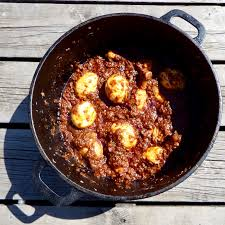

In [131]:
image = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}, Image height: {image.height}, Image width: {image.width}")
print(image)
image

### **2.1.4. Image Encoding**

- Images are **visual** data consisting of **pixels with varying intensity values** for RGB colors or grayscales.
- The **visual information** contained in an image should be transformed into a **structured data format**:
    - processed by computational algorithms
    - to perform mathematical operations
    - extract meaningful features
- The process of **converting an image into numerical representation** is referred to as "**image encoding**" or "**image digitization**".
- Image encoding involves representing **each pixel or region of an image as numerical values**.
    - Representing each pixel as a **grayscale intensity value** (ranging from 0 to 255)
    - Or, separate **Red, Green, and Blue (RGB) channel values** (ranging from 0 to 255 for each channel) are used for color images.
- This representation treats each pixel independently and is widely used for image processing tasks.

#### **Image to Numpy Array**


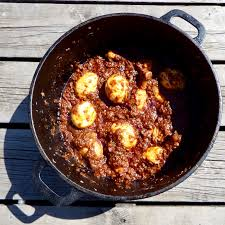

In [132]:
import numpy as np

image = Image.open(random_image_path)
image

array([[[ 43,  40,  47],
        [ 39,  36,  43],
        [ 35,  32,  39],
        ...,
        [229, 228, 233],
        [250, 249, 255],
        [247, 246, 254]],

       [[ 30,  27,  34],
        [ 25,  23,  28],
        [ 18,  15,  22],
        ...,
        [233, 232, 237],
        [243, 242, 247],
        [243, 242, 250]],

       [[121, 119, 124],
        [115, 113, 116],
        [107, 105, 110],
        ...,
        [217, 217, 219],
        [223, 222, 227],
        [222, 221, 229]],

       ...,

       [[201, 198, 191],
        [201, 198, 191],
        [201, 198, 193],
        ...,
        [217, 216, 212],
        [217, 216, 212],
        [216, 215, 211]],

       [[201, 198, 191],
        [201, 198, 191],
        [201, 198, 193],
        ...,
        [217, 216, 212],
        [217, 216, 212],
        [208, 207, 202]],

       [[200, 195, 189],
        [195, 190, 184],
        [195, 190, 184],
        ...,
        [227, 226, 222],
        [209, 208, 203],
        [218, 215, 208]]], dtype=uint8)
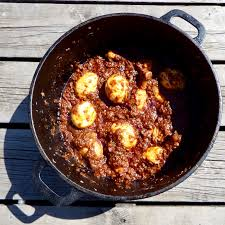

In [133]:
image_array = np.asarray(image)
image_array   # to display the numpy array, use print()

In [134]:
image_array.shape

(225, 225, 3)

- `[height, width, color_channels]`
    - color channels = 3 means color image (RGB)
    - color channels = 1 stands for grayscale image.
- Each pixel of the image is represend numerically from 0 to 255 whose data type is `torch.uint8`.

In [135]:
image_array.dtype

dtype('uint8')

- Plot of the numpy array using [`matplotlib.pyplot.imshow()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html).

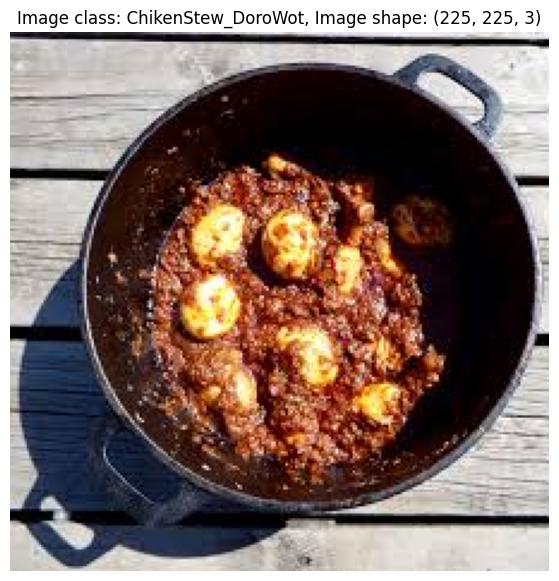

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(image_array)
plt.title(f"Image class: {image_class}, Image shape: {image_array.shape}")
plt.axis(False);

#### **Image Array to Tensor**

In [137]:
image_tensor = torch.from_numpy(image_array.copy())
image_tensor

tensor([[[ 43,  40,  47],
         [ 39,  36,  43],
         [ 35,  32,  39],
         ...,
         [229, 228, 233],
         [250, 249, 255],
         [247, 246, 254]],

        [[ 30,  27,  34],
         [ 25,  23,  28],
         [ 18,  15,  22],
         ...,
         [233, 232, 237],
         [243, 242, 247],
         [243, 242, 250]],

        [[121, 119, 124],
         [115, 113, 116],
         [107, 105, 110],
         ...,
         [217, 217, 219],
         [223, 222, 227],
         [222, 221, 229]],

        ...,

        [[201, 198, 191],
         [201, 198, 191],
         [201, 198, 193],
         ...,
         [217, 216, 212],
         [217, 216, 212],
         [216, 215, 211]],

        [[201, 198, 191],
         [201, 198, 191],
         [201, 198, 193],
         ...,
         [217, 216, 212],
         [217, 216, 212],
         [208, 207, 202]],

        [[200, 195, 189],
         [195, 190, 184],
         [195, 190, 184],
         ...,
         [227, 226, 222],
        

In [138]:
image_tensor.shape

torch.Size([225, 225, 3])

In [139]:
image_tensor.dtype

torch.uint8

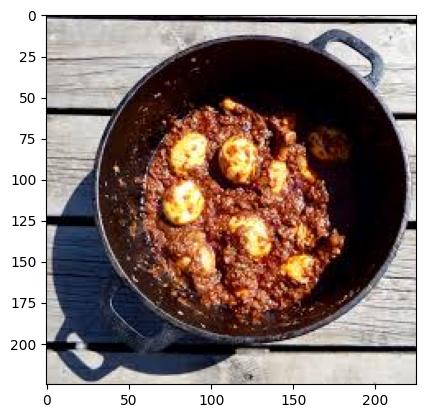

In [140]:
plt.imshow(image_tensor);

- Note `[height, width, color_channels]` is the default for `PIL` and `matplotlib`.
- The **same format is reserved when converting to tensor**.

### **2.1.5. Common Image Transformations**

- The loaded images often need to be transformed and preprocessed including:
    - resizing the images to a consistent size,
    - normalizing pixel values,
    - applying data augmentation such as random cropping or flipping.

- A variety of **image transformations** can be done using the `torchvision.transforms` module.

  1. Resize images to a specific size using [`transforms.Resize()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize).
      - Generally, the **larger the shape** of the image, the **more information** a model can recover.
      - An image of size `[256, 256, 3]` has 16x more pixels than an image of size `[64, 64, 3]` (`(256*256*3)/(64*64*3)=16`).
      - However, the tradeoff is that **more pixels requires more computations**.
  2. Flip images randomly on horizontally using [`transforms.RandomHorizontalFlip()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip).
      - It could be considered a form of data augmentation.
      - Because it will artificially change the image data.
  3. Turn images from a **PIL** format or **numpy array** to a PyTorch **tensor** using [`transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor).
      - This normalizes the pixel values from **0 to 255** (datatype `torch.uint8`) to **between 0.0 and 1.0** (datatype `torch.float32`).
      - Note `torch.from_numpy()` converts to tensor, but **does not normalize** the pixel values.

- These three transformations can be applied **individually**.
- They can be **combined** using the [`torchvision.transforms.Compose()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose) class.
    - It allows us to chain **multiple transformations together in a specific order**.

In [141]:
from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
    ])

In [142]:
transformed_image_tensor = image_transform(image)
transformed_image_tensor

tensor([[[0.3686, 0.3294, 0.3020,  ..., 0.7176, 0.7137, 0.7137],
         [0.7490, 0.7647, 0.7412,  ..., 0.4667, 0.4039, 0.3059],
         [0.7216, 0.7412, 0.7294,  ..., 0.8863, 0.9137, 0.8941],
         ...,
         [0.8078, 0.8000, 0.8000,  ..., 0.8824, 0.8824, 0.8784],
         [0.8000, 0.8000, 0.8078,  ..., 0.8627, 0.8706, 0.8627],
         [0.7843, 0.7922, 0.7961,  ..., 0.8627, 0.8588, 0.8510]],

        [[0.3608, 0.3216, 0.2941,  ..., 0.7176, 0.7137, 0.7137],
         [0.7412, 0.7569, 0.7373,  ..., 0.4667, 0.4039, 0.3059],
         [0.7176, 0.7373, 0.7255,  ..., 0.8902, 0.9176, 0.8980],
         ...,
         [0.7882, 0.7922, 0.8078,  ..., 0.8784, 0.8784, 0.8745],
         [0.7843, 0.7922, 0.8039,  ..., 0.8588, 0.8667, 0.8588],
         [0.7725, 0.7765, 0.7804,  ..., 0.8588, 0.8549, 0.8471]],

        [[0.3765, 0.3373, 0.3137,  ..., 0.7294, 0.7255, 0.7294],
         [0.7333, 0.7490, 0.7294,  ..., 0.4588, 0.4000, 0.3020],
         [0.6941, 0.7137, 0.7020,  ..., 0.8745, 0.8980, 0.

In [143]:
image_array.shape, transformed_image_tensor.shape

((225, 225, 3), torch.Size([3, 64, 64]))

- Note:
    - While `[height, width, color_channels]` is the default for `PIL` and `matplotlib`,
    - The default format in PyTorch is `[color_channels, height, width]`.

- To be compatible with `matplotlib`, `.permute()` can be used.

      `[height, width, color_channels]<-[color_channels, height, width].permute(1, 2, 0)`

In [144]:
image_array.dtype, transformed_image_tensor.dtype

(dtype('uint8'), torch.float32)

- Let us compare an original and transformed image.

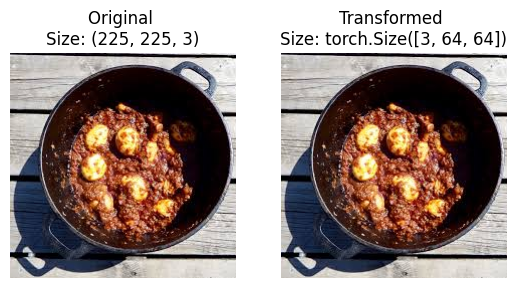

In [145]:
figure, axis = plt.subplots(1, 2)
axis[0].imshow(image_array)
axis[0].set_title(f"Original \nSize: {image_array.shape}")
axis[0].axis("off")
axis[1].imshow(transformed_image_tensor.permute(1, 2, 0))
axis[1].set_title(f"Transformed \nSize: {transformed_image_tensor.shape}")
axis[1].axis("off")
# figure.suptitle(f"Class: {random_image_path.parent.stem}", fontsize=12)
plt.imshow(image_array);

- Let us write a function to try out on various images.

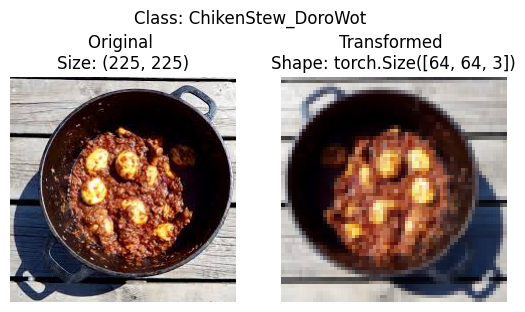

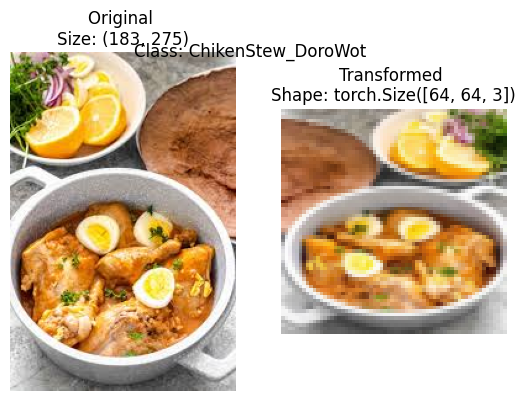

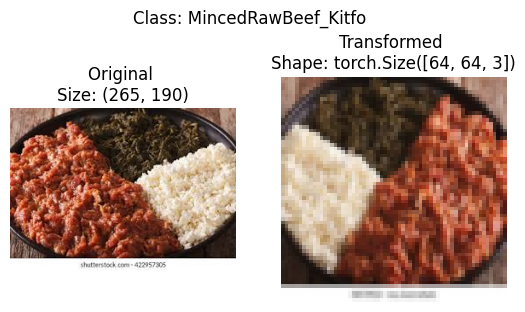

In [146]:
def plot_transformed_images(image_paths, transform, n = 3, seed = 42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            plt.subplots_adjust(top=1.1)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_img_tensor = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_img_tensor)
            ax[1].set_title(f"Transformed \nShape: {transformed_img_tensor.shape}")
            ax[1].axis(False)
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=12)

plot_transformed_images(image_paths, transform = image_transform, n = 3)

### **2.1.6. More On Data Augmentation**

- The purpose of tranforms ([`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html)) is to alter the images in some way.
  - That may be turning images into normalized tensors.
  - Or cropping it or randomly erasing a portion or randomly rotating them.
- Doing this kinds of transforms is often referred to as **data augmentation**.
  - The same data but different perspective(s): rotate, shift, zoom.
  - It is **artificially increasing the diversity of the training set**.
  - The aim is for better **generalization** (patterns to be robust to unseen examples).
- Different types of data augmentation can be performed using `torchvision.transforms`.
    - Random transforms (like [`transforms.RandAugment()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#randaugment) and [`transforms.TrivialAugmentWide()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#trivialaugmentwide)) generally perform better than hand-picked transforms.
    - They can be incorporated into `transforms.Compose()`.
- `TrivialAugment` is one of the ingredients used in a recent [state of the art](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements) training upgrade to various PyTorch vision models.
    - The main parameter to pay attention to in `transforms.TrivialAugmentWide()` is `num_magnitude_bins=31`.
    - It defines **how much of a range an intensity value** will be picked to apply a certain transform.
    - `0` being no range and `31` being maximum range (highest chance for highest intensity).


- Let test it out on some of the images?


In [147]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),                          #  224x224 = common size in image classification
    transforms.TrivialAugmentWide(num_magnitude_bins=31),   # how intense
    transforms.ToTensor()
    ])

- Note:  


In [148]:
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    ])

- **Note:**
    - The idea of data augmentation is to to **artificially increase the diversity of the training set** to better predict on the testing set.
    - There is **no need to perform augmentation on the test data**.
    * However, there is a need to make sure the **test set images are transformed to tensors**.
    * The **size the test images should be the same size as the training images**.
    * However, **inference can be done on different size images** if necessary (though this may alter performance).

- Let us test the data augmentation out!
    - Training transform with data augmentation.
    - Test transform without data augmentation.

In [149]:
images_path

PosixPath('train_test_data')

- Get all image paths

In [150]:
image_paths = list(images_path.glob("*/*/*.jpeg"))
print(len(image_paths))
image_paths[:10]

302


[PosixPath('train_test_data/train/ChikenStew_DoroWot/image (23).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (87).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (48).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (58).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (81).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (43).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (40).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (66).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (12).jpeg'),
 PosixPath('train_test_data/train/ChikenStew_DoroWot/image (79).jpeg')]

- Plot random images to see the impact of `TrivialAugment`.

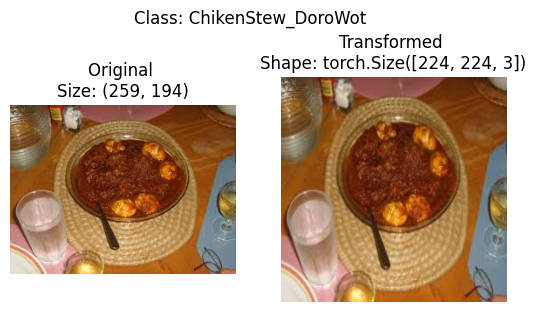

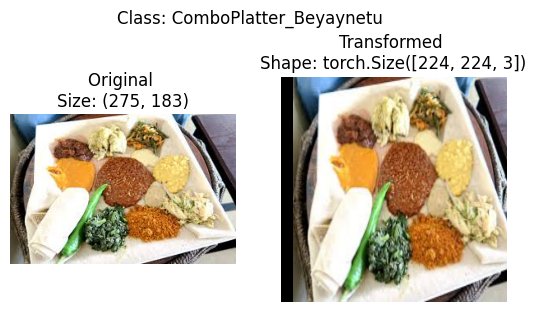

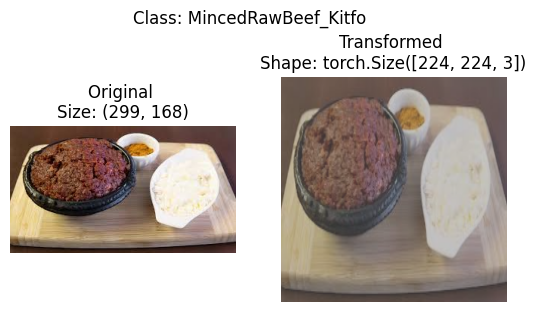

In [151]:
plot_transformed_images(
    image_paths = image_paths,
    transform = train_transforms,
    n = 3,
    seed = None
)

- Try running the cell above a few times and see how the original images change as going through the transforms.

- The impact of the augmentation is **not the same for each image**.

## **3.2. Loading Image Data Using 'Images Folder': Option 1**




### **3.2.1. Converting `ImageFolder` to PyTorch Dataset**

- In PyTorch, an `ImageFolder` is a specific type of dataset that is commonly used with the [`torchvision.datasets.ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder) class.
    - It is designed to **load an image dataset** where images are organized in a **standard folder structure**.
    - The image folder dataset assumes that the images are stored in separate subfolders.
    - **Each subfolder represents a different class**.

- The structure typically looks like this:
```
                root/class1/image1.jpg
                root/class1/image2.jpg
                ...
                root/class2/image1.jpg
                root/class2/image2.jpg
                ...
```

- The "`root`" is the **main folder containing all class subfolders**, and **each image file is placed within its corresponding class folder**.
- Once the data is in **standard image classification format**, an instance of `ImageFolder` can be instantiated.
   - It automatically **handles the folder structure** and **assigns labels to the images** based on subfolder names.

- Let us test it out on the data folders `train_dir` and `test_dir` passing in `transform = data_transform` to turn the images into tensors.

-  **Flexibility in data augumentation**: Image data often requires various preprocessing steps ( e.e., resizing, cropping, normalization, and data augmentation (e.g., random flips, rotations, color adjustments)).

In [203]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Use `ImageFolder` to create dataset(s)

In [204]:
train_dataset = datasets.ImageFolder(root = train_dir,            # target folder of images
                                    transform = image_transform,  # transforms to perform on data (images)
                                    target_transform = None)      # transforms to perform on labels (if necessary)

test_dataset = datasets.ImageFolder(root = test_dir, transform = image_transform)

print(f"Train data:\n{train_dataset}\nTest data:\n{test_dataset}")

Train data:
Dataset ImageFolder
    Number of datapoints: 240
    Root location: train_test_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 62
    Root location: train_test_data/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


- It looks like PyTorch has registered the training and testing datasets.

In [154]:
train_dataset[0]

(tensor([[[0.9843, 0.8235, 0.7529,  ..., 0.9804, 0.9843, 0.9961],
          [0.9843, 0.8235, 0.7216,  ..., 0.8157, 0.8902, 0.9961],
          [0.9882, 0.8784, 0.7059,  ..., 0.7725, 0.8902, 0.9961],
          ...,
          [1.0000, 0.8078, 0.4588,  ..., 0.6941, 0.8196, 1.0000],
          [1.0000, 0.8941, 0.7176,  ..., 0.8157, 0.8980, 0.9961],
          [1.0000, 0.9961, 1.0000,  ..., 0.9961, 0.9922, 0.9961]],
 
         [[1.0000, 0.7725, 0.6275,  ..., 0.9725, 0.9843, 1.0000],
          [1.0000, 0.7686, 0.5922,  ..., 0.8039, 0.8941, 0.9961],
          [1.0000, 0.8275, 0.5647,  ..., 0.7686, 0.9059, 0.9961],
          ...,
          [1.0000, 0.7765, 0.3569,  ..., 0.5647, 0.7569, 0.9961],
          [1.0000, 0.8784, 0.6706,  ..., 0.7647, 0.8745, 1.0000],
          [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9922, 1.0000]],
 
         [[0.9882, 0.6431, 0.3176,  ..., 0.9529, 0.9725, 1.0000],
          [0.9882, 0.6588, 0.3216,  ..., 0.7843, 0.8980, 1.0000],
          [0.9882, 0.7451, 0.3647,  ...,

### **3.2.2. Inspecting Key Elements**

- See all attributes and inspect

In [155]:
# dir(train_dataset)

In [156]:
len(train_dataset), len(test_dataset)

(240, 62)

- Target labels of the image data can be inspected using `.targets` like the dataset for structured data.

In [157]:
train_dataset.targets[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

- However, for the current image data, there is no `.data` attribute like structured data.
    - It has rather `.samples` attribute (lists paths and labels)

In [158]:
train_dataset.samples[:10]

[('train_test_data/train/ChikenStew_DoroWot/image (10).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (11).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (12).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (14).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (15).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (16).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (17).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (18).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (19).jpeg', 0),
 ('train_test_data/train/ChikenStew_DoroWot/image (2).jpeg', 0)]

In [159]:
train_dataset.samples[0]

('train_test_data/train/ChikenStew_DoroWot/image (10).jpeg', 0)

- Checking out the **class names** as a **list** using `.classes` and as a **dictionary** using `.class_to_idx` attributes
- The lengths of the training and test sets.

In [160]:
classes_list = train_dataset.classes
classes_list

['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo']

In [161]:
classes_dict = train_dataset.class_to_idx
classes_dict

{'ChikenStew_DoroWot': 0,
 'ComboPlatter_Beyaynetu': 1,
 'MincedRawBeef_Kitfo': 2}

### **3.2.3. Indexing Image Tensors and Labels**

- We can index on the `train_dataset` and `test_dataset` to find examples and their target labels.

In [162]:
train_dataset[0]

(tensor([[[0.9961, 0.9843, 0.9804,  ..., 0.7529, 0.8235, 0.9843],
          [0.9961, 0.8902, 0.8157,  ..., 0.7216, 0.8235, 0.9843],
          [0.9961, 0.8902, 0.7725,  ..., 0.7059, 0.8784, 0.9882],
          ...,
          [1.0000, 0.8196, 0.6941,  ..., 0.4588, 0.8078, 1.0000],
          [0.9961, 0.8980, 0.8157,  ..., 0.7176, 0.8941, 1.0000],
          [0.9961, 0.9922, 0.9961,  ..., 1.0000, 0.9961, 1.0000]],
 
         [[1.0000, 0.9843, 0.9725,  ..., 0.6275, 0.7725, 1.0000],
          [0.9961, 0.8941, 0.8039,  ..., 0.5922, 0.7686, 1.0000],
          [0.9961, 0.9059, 0.7686,  ..., 0.5647, 0.8275, 1.0000],
          ...,
          [0.9961, 0.7569, 0.5647,  ..., 0.3569, 0.7765, 1.0000],
          [1.0000, 0.8745, 0.7647,  ..., 0.6706, 0.8784, 1.0000],
          [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9922, 1.0000]],
 
         [[1.0000, 0.9725, 0.9529,  ..., 0.3176, 0.6431, 0.9882],
          [1.0000, 0.8980, 0.7843,  ..., 0.3216, 0.6588, 0.9882],
          [1.0000, 0.9176, 0.7412,  ...,

In [163]:
train_dataset[0][0]

tensor([[[0.9961, 0.9843, 0.9804,  ..., 0.7529, 0.8235, 0.9843],
         [0.9961, 0.8902, 0.8157,  ..., 0.7216, 0.8235, 0.9843],
         [0.9961, 0.8902, 0.7725,  ..., 0.7059, 0.8784, 0.9882],
         ...,
         [1.0000, 0.8196, 0.6941,  ..., 0.4588, 0.8078, 1.0000],
         [0.9961, 0.8980, 0.8157,  ..., 0.7176, 0.8941, 1.0000],
         [0.9961, 0.9922, 0.9961,  ..., 1.0000, 0.9961, 1.0000]],

        [[1.0000, 0.9843, 0.9725,  ..., 0.6275, 0.7725, 1.0000],
         [0.9961, 0.8941, 0.8039,  ..., 0.5922, 0.7686, 1.0000],
         [0.9961, 0.9059, 0.7686,  ..., 0.5647, 0.8275, 1.0000],
         ...,
         [0.9961, 0.7569, 0.5647,  ..., 0.3569, 0.7765, 1.0000],
         [1.0000, 0.8745, 0.7647,  ..., 0.6706, 0.8784, 1.0000],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9922, 1.0000]],

        [[1.0000, 0.9725, 0.9529,  ..., 0.3176, 0.6431, 0.9882],
         [1.0000, 0.8980, 0.7843,  ..., 0.3216, 0.6588, 0.9882],
         [1.0000, 0.9176, 0.7412,  ..., 0.3647, 0.7451, 0.

In [164]:
train_dataset[0][0].shape

torch.Size([3, 64, 64])

In [165]:
train_dataset[0][1]

0

In [166]:
image_tensor_0, label_0 = train_dataset[0][0], train_dataset[0][1]

In [167]:
image_tensor_0, label_0 = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{image_tensor_0}")
print(f"Image shape: {image_tensor_0.shape}")
print(f"Image datatype: {image_tensor_0.dtype}")
print(f"Image label: {label_0}")
print(f"Label datatype: {type(label_0)}")

Image tensor:
tensor([[[0.9843, 0.8235, 0.7529,  ..., 0.9804, 0.9843, 0.9961],
         [0.9843, 0.8235, 0.7216,  ..., 0.8157, 0.8902, 0.9961],
         [0.9882, 0.8784, 0.7059,  ..., 0.7725, 0.8902, 0.9961],
         ...,
         [1.0000, 0.8078, 0.4588,  ..., 0.6941, 0.8196, 1.0000],
         [1.0000, 0.8941, 0.7176,  ..., 0.8157, 0.8980, 0.9961],
         [1.0000, 0.9961, 1.0000,  ..., 0.9961, 0.9922, 0.9961]],

        [[1.0000, 0.7725, 0.6275,  ..., 0.9725, 0.9843, 1.0000],
         [1.0000, 0.7686, 0.5922,  ..., 0.8039, 0.8941, 0.9961],
         [1.0000, 0.8275, 0.5647,  ..., 0.7686, 0.9059, 0.9961],
         ...,
         [1.0000, 0.7765, 0.3569,  ..., 0.5647, 0.7569, 0.9961],
         [1.0000, 0.8784, 0.6706,  ..., 0.7647, 0.8745, 1.0000],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9922, 1.0000]],

        [[0.9882, 0.6431, 0.3176,  ..., 0.9529, 0.9725, 1.0000],
         [0.9882, 0.6588, 0.3216,  ..., 0.7843, 0.8980, 1.0000],
         [0.9882, 0.7451, 0.3647,  ..., 0.74

- The images are now in the form of a tensor (with shape `[3, 64, 64]`).
- The labels are in the form of an integer relating to a specific class (as referenced by the `class_to_idx` attribute).

### **3.2.4. Visualizing an Image Tensor**

- The image dimensions are in the format `CHW` (color channels, height, width).
- However, `matplotlib` uses `HWC` (height, width, color channels).
- Hence, it is required to first **rearrange the order of the dimensions** for `matplotlib`.

In [168]:
image_tensor_0_permute = image_tensor_0.permute(1, 2, 0)

print(f"Original shape: {image_tensor_0.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {image_tensor_0_permute.shape} -> [height, width, color_channels]")

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


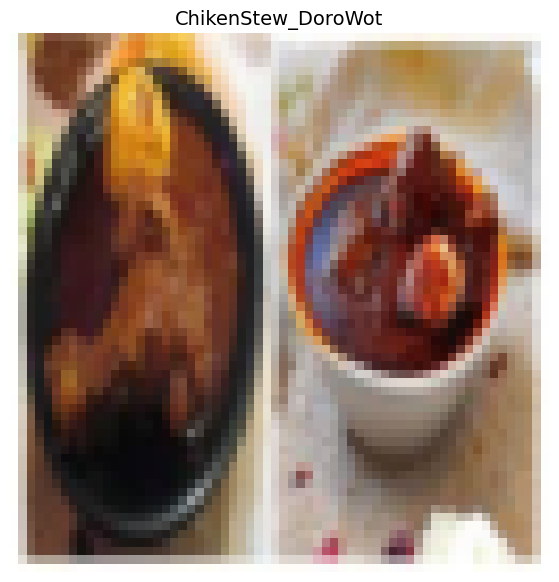

In [169]:
plt.figure(figsize=(10, 7))
plt.imshow(image_tensor_0.permute(1, 2, 0))
plt.axis("off")
plt.title(classes_list[label_0], fontsize=14);

- Notice the image is now **more pixelated (less quality)** due to being resized from `512x512` to `64x64` pixels.
- The intuition here is that if the image is **harder to recognize**, a model will find it **harder to understand** too.

### **3.2.5. PyTorch Dataset to DataLoader**


- Now let us turn the train and test sets into their own `DataLoader`s.
- A `DataLoader` provides an **iterable over the dataset, yielding batches of data**.

In [170]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = 1

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              num_workers = NUM_WORKERS,
                              shuffle = True)
train_dataloader

In [171]:
# dir(train_dataloader)

In [172]:
list(train_dataloader)[0]

[tensor([[[[0.3961, 0.3804, 0.3725,  ..., 0.5059, 0.5255, 0.6431],
           [0.3922, 0.3961, 0.5255,  ..., 0.5569, 0.6706, 0.7765],
           [0.3569, 0.4902, 0.6510,  ..., 0.6392, 0.6235, 0.7020],
           ...,
           [0.5529, 0.5686, 0.5804,  ..., 0.6863, 0.6706, 0.6314],
           [0.5804, 0.5882, 0.5804,  ..., 0.6941, 0.6824, 0.6431],
           [0.5725, 0.6000, 0.5647,  ..., 0.6588, 0.6863, 0.6706]],
 
          [[0.3137, 0.3294, 0.3608,  ..., 0.3216, 0.3412, 0.5490],
           [0.3294, 0.3569, 0.5176,  ..., 0.4196, 0.5882, 0.7216],
           [0.3176, 0.4667, 0.6431,  ..., 0.5490, 0.5804, 0.6627],
           ...,
           [0.5451, 0.5608, 0.5725,  ..., 0.6980, 0.6824, 0.6431],
           [0.5725, 0.5804, 0.5725,  ..., 0.7059, 0.6941, 0.6549],
           [0.5647, 0.5922, 0.5569,  ..., 0.6706, 0.6980, 0.6824]],
 
          [[0.2510, 0.2706, 0.3137,  ..., 0.2000, 0.2235, 0.4549],
           [0.2588, 0.3020, 0.4863,  ..., 0.3020, 0.4667, 0.6275],
           [0.2510, 0.42

In [173]:
train_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 240
    Root location: train_test_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [174]:
train_dataloader.dataset[0]

(tensor([[[0.9843, 0.8235, 0.7529,  ..., 0.9804, 0.9843, 0.9961],
          [0.9843, 0.8235, 0.7216,  ..., 0.8157, 0.8902, 0.9961],
          [0.9882, 0.8784, 0.7059,  ..., 0.7725, 0.8902, 0.9961],
          ...,
          [1.0000, 0.8078, 0.4588,  ..., 0.6941, 0.8196, 1.0000],
          [1.0000, 0.8941, 0.7176,  ..., 0.8157, 0.8980, 0.9961],
          [1.0000, 0.9961, 1.0000,  ..., 0.9961, 0.9922, 0.9961]],
 
         [[1.0000, 0.7725, 0.6275,  ..., 0.9725, 0.9843, 1.0000],
          [1.0000, 0.7686, 0.5922,  ..., 0.8039, 0.8941, 0.9961],
          [1.0000, 0.8275, 0.5647,  ..., 0.7686, 0.9059, 0.9961],
          ...,
          [1.0000, 0.7765, 0.3569,  ..., 0.5647, 0.7569, 0.9961],
          [1.0000, 0.8784, 0.6706,  ..., 0.7647, 0.8745, 1.0000],
          [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9922, 1.0000]],
 
         [[0.9882, 0.6431, 0.3176,  ..., 0.9529, 0.9725, 1.0000],
          [0.9882, 0.6588, 0.3216,  ..., 0.7843, 0.8980, 1.0000],
          [0.9882, 0.7451, 0.3647,  ...,

In [175]:
train_dataloader.dataset[0][0]

tensor([[[0.9843, 0.8235, 0.7529,  ..., 0.9804, 0.9843, 0.9961],
         [0.9843, 0.8235, 0.7216,  ..., 0.8157, 0.8902, 0.9961],
         [0.9882, 0.8784, 0.7059,  ..., 0.7725, 0.8902, 0.9961],
         ...,
         [1.0000, 0.8078, 0.4588,  ..., 0.6941, 0.8196, 1.0000],
         [1.0000, 0.8941, 0.7176,  ..., 0.8157, 0.8980, 0.9961],
         [1.0000, 0.9961, 1.0000,  ..., 0.9961, 0.9922, 0.9961]],

        [[1.0000, 0.7725, 0.6275,  ..., 0.9725, 0.9843, 1.0000],
         [1.0000, 0.7686, 0.5922,  ..., 0.8039, 0.8941, 0.9961],
         [1.0000, 0.8275, 0.5647,  ..., 0.7686, 0.9059, 0.9961],
         ...,
         [1.0000, 0.7765, 0.3569,  ..., 0.5647, 0.7569, 0.9961],
         [1.0000, 0.8784, 0.6706,  ..., 0.7647, 0.8745, 1.0000],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9922, 1.0000]],

        [[0.9882, 0.6431, 0.3176,  ..., 0.9529, 0.9725, 1.0000],
         [0.9882, 0.6588, 0.3216,  ..., 0.7843, 0.8980, 1.0000],
         [0.9882, 0.7451, 0.3647,  ..., 0.7412, 0.9176, 1.

In [176]:
train_dataloader.dataset[0][1]

0

In [177]:
test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             num_workers = NUM_WORKERS,
                             shuffle = False)

test_dataloader

- Now the the train and test DataLoaders are both **iterable**.
- Let us try inspect some attributes from these instances.

In [178]:
len(train_dataloader), len(test_dataloader)

(240, 62)

- Since batch size = 1, **number of batches** in the training `DataLoader` is the same with the **number of training samples**.
- It is the same for the testing samples too.

In [179]:
list(train_dataloader)[0]

[tensor([[[[0.4980, 0.5529, 0.6627,  ..., 0.7333, 0.7569, 0.7647],
           [0.4902, 0.6314, 0.6745,  ..., 0.7529, 0.7765, 0.7725],
           [0.5804, 0.6196, 0.6039,  ..., 0.7569, 0.7765, 0.7882],
           ...,
           [0.2588, 0.2588, 0.2588,  ..., 0.9490, 0.9569, 0.9647],
           [0.2588, 0.2588, 0.2588,  ..., 0.9412, 0.9451, 0.9451],
           [0.2627, 0.2627, 0.2627,  ..., 0.9333, 0.9255, 0.9333]],
 
          [[0.2510, 0.3412, 0.5059,  ..., 0.1647, 0.1725, 0.1765],
           [0.2745, 0.4549, 0.5451,  ..., 0.1569, 0.1647, 0.1569],
           [0.3804, 0.4510, 0.4824,  ..., 0.1255, 0.1333, 0.1373],
           ...,
           [0.1412, 0.1412, 0.1412,  ..., 0.8431, 0.8471, 0.8549],
           [0.1412, 0.1412, 0.1412,  ..., 0.8353, 0.8353, 0.8353],
           [0.1451, 0.1451, 0.1451,  ..., 0.8235, 0.8157, 0.8235]],
 
          [[0.0431, 0.1804, 0.3922,  ..., 0.0118, 0.0157, 0.0118],
           [0.0549, 0.2627, 0.3922,  ..., 0.0157, 0.0157, 0.0078],
           [0.1529, 0.23

In [180]:
print(f"Batch 1:\n{next(iter(train_dataloader))}")
print(f"Batch 2:\n {next(iter(train_dataloader))}")
print(f"Batch 3:\n {next(iter(train_dataloader))}")

Batch 1:
[tensor([[[[0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9294, 0.9294],
          [0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9373, 0.9373],
          ...,
          [0.9373, 0.9294, 0.9412,  ..., 0.9333, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.9412,  ..., 0.9373, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.9412,  ..., 0.9373, 0.9373, 0.9373]],

         [[0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9294, 0.9294],
          [0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9373, 0.9373],
          ...,
          [0.9373, 0.9294, 0.9412,  ..., 0.9333, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.9412,  ..., 0.9373, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.9412,  ..., 0.9373, 0.9373, 0.9373]],

         [[0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9294, 0.9294],
          [0.9373, 0.9373, 0.9373,  ..., 0.9333, 0.9373, 0.9373],
          [0.9373, 0.9373, 0.937

In [181]:
image_tensor, label = next(iter(train_dataloader))

print(f"Image shape: {image_tensor.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


- **Notes**:
    - The data loader adds  **batch size** dimension to the shape of the dataset:

            `[batch_size, color_channels, height, width] <- [color_channels, height, width]`

    - Batch size is set to be 1, try changing the `batch_size` parameter above, say to 32, and see what will happen.



- Let us look at another option to load images (or almost any other kind of data).

## **3.3. Replicating of Functionality of `ImageFolder`: Option 2**


In [182]:
import os
import pathlib
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

### **3.3.1. Find Classes in Target Directory**

- Remember the `classes` and `class_to_idx` attributes in the instance of `torchvision.datasets.ImageFolder()` .

In [183]:
train_dataset.classes, train_dataset.class_to_idx

(['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo'],
 {'ChikenStew_DoroWot': 0,
  'ComboPlatter_Beyaynetu': 1,
  'MincedRawBeef_Kitfo': 2})

- With this in mind, let us define a function to create a **list** and a **dictionary** of classes in given a directory.
- To do so, :
    1. Get **classes** using `os.scandir()` to traverse a target directory,  which is ideally in a **standard image classification format**.
    2. Raise an **error** if the classes are **not found because of something wrong** in the directory structure.
    3. Turn **classes** into a **dictionary** of numerical labels, one for each class.

In [184]:
os.scandir(train_dir)

In [185]:
list(os.scandir(train_dir))

[<DirEntry 'ChikenStew_DoroWot'>,
 <DirEntry 'MincedRawBeef_Kitfo'>,
 <DirEntry 'ComboPlatter_Beyaynetu'>]

In [186]:
list(os.scandir(train_dir))[0].name

'ChikenStew_DoroWot'

In [187]:
target_directory = train_dir
print(f"Directory: {target_directory}")
classes_list = sorted([entry.name for entry in list(os.scandir(target_directory))])
print(f"Classes: {classes_list}")

Directory: train_test_data/train
Classes: ['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo']


- Let us make the function to find classes in a given target directory.

In [188]:
def find_classes(directory: str):
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"No classes in {directory}.")
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [189]:
find_classes(train_dir)

(['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo'],
 {'ChikenStew_DoroWot': 0,
  'ComboPlatter_Beyaynetu': 1,
  'MincedRawBeef_Kitfo': 2})

### **3.3.2. Define a Custom Dataset Class**

- To replicate the functionality of `torchvision.datasets.ImageFolder()`:
  1. Subclass `torch.utils.data.Dataset` (base class for all datasets in PyTorch).
  2. Initialize the subclass with target data directory and the optional `transform` parameter.
  3. Create attributes:
    * `paths` - paths of images,
    * `transform` - transformation to be made (can be `None`),
    * `classes` -  a list of target classes
    * `class_to_idx` - a dictionary of target classes mapped to integer labels.
  4. Create a function `load_images()` to load images from file and then open it in return.
  5. Overwrite the `__len__` method to return **number of samples** in the dataset (*recommended, not required*).
  6. Overwrite the `__getitem__` method **to return a single sample** from the dataset (*required*).


In [190]:
from torch.utils.data import Dataset

class CustomImageFolder(Dataset):
    def __init__(self, targ_dir: str, transform = None):
        self.paths = list(Path(targ_dir).glob("*/*.jpeg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index: int):
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index: int):
        image_tensor = self.load_image(index)
        class_name  = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(image_tensor), class_idx  # return (data, label) = (X, y)
        else:
            return image_tensor, class_idx                  # return (data, label) = (X, y)

### **3.3.3. Create an Instance of the Custom Dataset**


In [191]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
    ])

- Now turn the training images in `train_dir` and the testing images in `test_dir` into PyTorch dataset using the  `CustomImageFolder` class.

In [192]:
train_dataset_custom = CustomImageFolder(targ_dir = train_dir,
                                      transform = train_transforms)
test_dataset_custom = CustomImageFolder(targ_dir = test_dir,
                                     transform = test_transforms)
train_dataset_custom, test_dataset_custom

(<__main__.CustomImageFolder at 0x79b8df7047c0>,
 <__main__.CustomImageFolder at 0x79b8d96d7df0>)

- No errors, it worked.

- Now inspect the main attributes of the dataset

In [193]:
len(train_dataset), len(train_dataset_custom)

(240, 240)

In [194]:
len(test_dataset), len(test_dataset_custom)

(62, 62)

`len(test_data_custom) == len(test_data)` and `len(test_data_custom) == len(test_data)` Yes!!!

In [195]:
train_dataset_custom.classes

['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo']

In [196]:
train_dataset_custom.class_to_idx

{'ChikenStew_DoroWot': 0,
 'ComboPlatter_Beyaynetu': 1,
 'MincedRawBeef_Kitfo': 2}

- Check for equality amongst the `CustomImageFolder` and the built-in `ImageFolder` datasets.

In [197]:
print((len(train_dataset_custom) == len(train_dataset)) & (len(test_dataset_custom) == len(test_dataset)))
print(train_dataset_custom.classes == train_dataset.classes)
print(train_dataset_custom.class_to_idx == train_dataset.class_to_idx)

True
True
True


###  **3.3.4. Displaying Random Images**

- Let us create a function to visualize some images from the dataset.

  1. Inputs: `Dataset`, target **classes**, number of images (`n=10`).
  2. Get a list of **random sample indexes** to plot.
  3. Plot sampled images, shape is of the form `HWC`.

In [198]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes = None,
                          n: int = 10,
                          display_shape: bool = True,                 # to see transformed shape
                          seed: int = None):                          # 1. Take in a Dataset as well as a list of class names
    if n > 10:
      n = 10
      display_shape = False #
      print(f"For not being overlapped and crowded, only 10 are considered.")
    if seed:
      random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k = n)
    plt.figure(figsize=(16, 8))
    for idx, image_idx in enumerate(random_samples_idx):
      image_tensor, label = dataset[image_idx][0], dataset[image_idx][1]
      image_tensor_adjust = image_tensor.permute(1, 2, 0)       # [H, W, C] <- [C, H, W]
      plt.subplot(1, n, idx + 1)
      plt.imshow(image_tensor_adjust)
      plt.axis("off")
      if classes:
        title = f"Class: {classes[label]}"
        if display_shape:
          title = title + f"\nShape: {image_tensor_adjust.shape}"
      plt.title(title)

Let's test it out first with the dataset we created using `torchvision.datasets.ImageFolder()`.

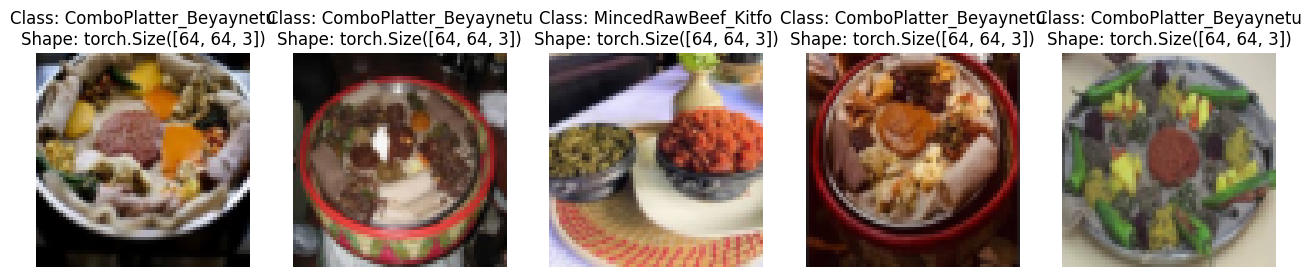

In [199]:
display_random_images(train_dataset, n = 5, classes = classes, seed = None)

For not being overlapped and crowded, only 10 are considered.


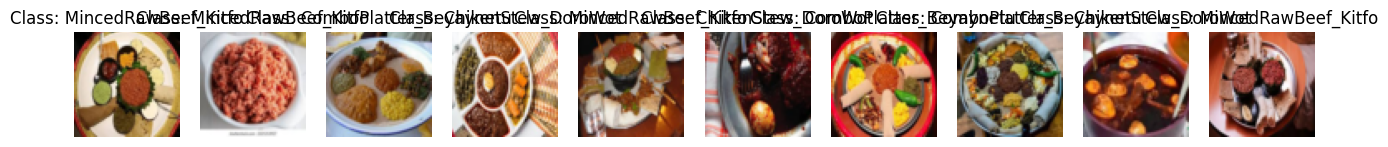

In [200]:
display_random_images(train_dataset_custom, n = 12, classes = classes, seed = None)

### **3.3.5. Turning PyTorch Custom Datasets into DataLoaders**

- Because the custom datasets subclass `torch.utils.data.Dataset`, we can use them directly with `torch.utils.data.DataLoader()`.

In [201]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset = train_dataset_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)

test_dataloader_custom = DataLoader(dataset = test_dataset_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = NUM_WORKERS,
                                    shuffle = False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x79b8df73dea0>,
 <torch.utils.data.dataloader.DataLoader at 0x79b8d8ecd180>)

- Do the shapes of the samples look the same?

In [202]:
image_tensor_custom, label_custom = next(iter(train_dataloader_custom))
print(f"Image shape: {image_tensor_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])
